In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import yfinance as yf
from random import randint
from keras.preprocessing import sequence 
from keras.datasets import imdb
from sklearn.model_selection import cross_validate
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, Dense, MaxPool1D, LSTM, Conv1D, Conv2D, Embedding, Flatten, SimpleRNN
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import scipy.io
import urllib.request
import requests
from sklearn.model_selection import KFold
from scipy import stats
import random

C:\Users\90546\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Question 1

In [213]:
dataset = tfds.load('celeb_a', split='train')
data = dataset.take(10000)

In [214]:
x1, y1 = [],[]
for i in data:
    x1.append(i['image'])
    y1.append(i['attributes'])

In [220]:
X_image = np.array(x1)
X_image.shape

(10000, 218, 178, 3)

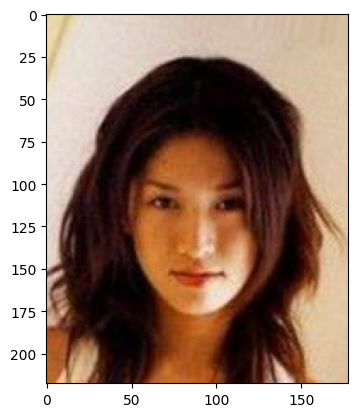

In [221]:
plt.imshow(X[random.randint(0,X_image.shape[1])])

In [111]:
df_attr = pd.DataFrame.from_dict(y1, dtype=bool)
df_attr

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,False,False,True,False,False,False,True,False,False,False,...,False,True,False,True,False,False,True,False,False,True
1,True,True,False,False,True,False,True,True,False,False,...,True,True,False,False,False,False,False,False,False,True
2,False,False,True,False,False,True,False,False,False,True,...,False,True,True,False,False,False,True,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,True,True,False,True,False,True,False,False,True
4,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,True,True,False,False,False,False,False,False,False,...,False,True,False,True,False,False,True,False,False,False
9996,False,False,True,True,False,False,True,False,False,True,...,False,False,True,False,False,False,True,True,False,True
9997,False,True,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
9998,False,False,False,False,False,False,False,False,False,True,...,False,True,False,True,False,False,False,False,False,True


In [222]:
def func(df, attr, X_image):
    y = df_attr[attr]
    binarizer = LabelBinarizer()
    Y = binarizer.fit_transform(y)
    X_train, X_test, Y_train, Y_test = train_test_split(X_image,Y,train_size=0.8)
    return X_train, X_test, Y_train, Y_test, Y

In [223]:
model = Sequential()
model.add(Conv2D(3, 2, activation='relu', input_shape=(218,178,3,)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adamax', 
              metrics = ['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 217, 177, 3)       39        
                                                                 
 flatten_6 (Flatten)         (None, 115227)            0         
                                                                 
 dense_25 (Dense)            (None, 256)               29498368  
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dense_27 (Dense)            (None, 1)                 129       
                                                                 
Total params: 29,531,432
Trainable params: 29,531,432
Non-trainable params: 0
_________________________________________________________________


In [225]:
def func2(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train,
          batch_size = 256,
          epochs = 15,
          validation_data = (X_test, Y_test))
    Y_pred = model.predict(X_test)
    result = np.where(Y_pred > 0.5, 1, 0)  
    print('Predictions:\n',Y_pred)
    print('Comnfusion matrix:\n',confusion_matrix(Y_test, result))
    print(classification_report(Y_test, result))

In [228]:
def crossValidation(X, Y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = []
    for i, j in kf.split(X):
        X_train_val, X_test_val = X[i], X[j]
        y_train_val, y_test_val = Y[i], Y[j]
        model.fit(X_train_val, y_train_val, epochs=15, batch_size=256, verbose=0)
        score = model.evaluate(X_test_val, y_test_val, verbose=0)
        cv_scores.append(score)
    return cv_scores

In [227]:
print(df_attr[df_attr['Eyeglasses'] == True].count()[0], df_attr[df_attr['Eyeglasses'] == False].count()[0])
print(df_attr[df_attr['Male'] == True].count()[0], df_attr[df_attr['Male'] == False].count()[0])
print(df_attr[df_attr['Bangs'] == True].count()[0], df_attr[df_attr['Bangs'] == False].count()[0])

669 9331
4190 5810
1493 8507


# Glasses

In [229]:
XG_train, XG_test, YG_train, YG_test, YG = func(df_attr, 'Eyeglasses', X_image)

In [230]:
func2(model, XG_train, XG_test, YG_train, YG_test)

Epoch 1/15
32/32 [==============================] - 49s 1s/step - loss: 1501.1667 - accuracy: 0.8501 - val_loss: 472.8416 - val_accuracy: 0.9345
Epoch 2/15
32/32 [==============================] - 47s 1s/step - loss: 198.2001 - accuracy: 0.8999 - val_loss: 60.8217 - val_accuracy: 0.9355
Epoch 3/15
32/32 [==============================] - 52s 2s/step - loss: 197.5688 - accuracy: 0.8816 - val_loss: 709.0752 - val_accuracy: 0.9345
Epoch 4/15
32/32 [==============================] - 50s 2s/step - loss: 372.6619 - accuracy: 0.8923 - val_loss: 305.2473 - val_accuracy: 0.9345
Epoch 5/15
32/32 [==============================] - 48s 2s/step - loss: 208.5493 - accuracy: 0.8900 - val_loss: 633.8093 - val_accuracy: 0.9345
Epoch 6/15
32/32 [==============================] - 48s 1s/step - loss: 305.6075 - accuracy: 0.8944 - val_loss: 41.5401 - val_accuracy: 0.9450
Epoch 7/15
32/32 [==============================] - 49s 2s/step - loss: 42.0578 - accuracy: 0.9308 - val_loss: 18.7161 - val_accuracy: 0.

In [231]:
crossValidation(X_image, YG)

[[17.5988826751709, 0.965499997138977],
 [8.70543384552002, 0.968500018119812],
 [16.408435821533203, 0.9589999914169312],
 [5.5822978019714355, 0.9459999799728394],
 [2.8350250720977783, 0.9789999723434448]]

In [232]:
# This part was taken from ChatGPT
# calculate the mean and standard deviation of the scores
mean = np.mean(cv_scores)
std = np.std(cv_scores)

# determine the t-value for a 95% confidence interval
t = stats.t.interval(alpha=0.95, df=len(cv_scores)-1)[1]

# calculate the confidence interval
ci = [mean - t * std / np.sqrt(len(cv_scores)), mean + t * std / np.sqrt(len(cv_scores))]
print(f"Confidence interval: {ci}")

Confidence interval: [-2.6175688621964013, 9.403664828036323]


C:\Users\90546\AppData\Local\Temp\ipykernel_364692\1072106856.py:7: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  t = stats.t.interval(alpha=0.95, df=len(cv_scores)-1)[1]


# Male

In [233]:
XM_train, XM_test, YM_train, YM_test, YM = func(df_attr, 'Male', X_image)

In [234]:
func2(model, XM_train, XM_test, YM_train, YM_test)

Epoch 1/15
32/32 [==============================] - 47s 1s/step - loss: 651.8967 - accuracy: 0.5585 - val_loss: 152.1074 - val_accuracy: 0.6925
Epoch 2/15
32/32 [==============================] - 45s 1s/step - loss: 133.2054 - accuracy: 0.7168 - val_loss: 151.0893 - val_accuracy: 0.5830
Epoch 3/15
32/32 [==============================] - 48s 2s/step - loss: 52.4479 - accuracy: 0.7921 - val_loss: 32.2090 - val_accuracy: 0.8310
Epoch 4/15
32/32 [==============================] - 59s 2s/step - loss: 27.1298 - accuracy: 0.8339 - val_loss: 16.8312 - val_accuracy: 0.8755
Epoch 5/15
32/32 [==============================] - 52s 2s/step - loss: 27.6446 - accuracy: 0.8278 - val_loss: 24.5930 - val_accuracy: 0.8355
Epoch 6/15
32/32 [==============================] - 54s 2s/step - loss: 26.9192 - accuracy: 0.8282 - val_loss: 33.6008 - val_accuracy: 0.8010
Epoch 7/15
32/32 [==============================] - 50s 2s/step - loss: 17.8437 - accuracy: 0.8609 - val_loss: 43.7572 - val_accuracy: 0.7370
Ep

In [240]:
crossValidation(X_image, YM)

[[3.480037212371826, 0.8989999890327454],
 [2.007512092590332, 0.9315000176429749],
 [0.9232369065284729, 0.9490000009536743],
 [0.18338462710380554, 0.9760000109672546],
 [0.26621213555336, 0.9710000157356262]]

In [136]:
# This part was taken from ChatGPT
# calculate the mean and standard deviation of the scores
mean = np.mean(cv_scores)
std = np.std(cv_scores)

# determine the t-value for a 95% confidence interval
t = stats.t.interval(alpha=0.95, df=len(cv_scores)-1)[1]

# calculate the confidence interval
ci = [mean - t * std / np.sqrt(len(cv_scores)), mean + t * std / np.sqrt(len(cv_scores))]
print(f"Confidence interval: {ci}")

Confidence interval: [-2.6175688621964013, 9.403664828036323]


C:\Users\90546\AppData\Local\Temp\ipykernel_364692\1072106856.py:7: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  t = stats.t.interval(alpha=0.95, df=len(cv_scores)-1)[1]


# Bangs

In [235]:
XB_train, XB_test, YB_train, YB_test, YB = func(df_attr, 'Bangs', X_image)

In [236]:
func2(model, XB_train, XB_test, YB_train, YB_test)

Epoch 1/15
32/32 [==============================] - 49s 2s/step - loss: 141.9761 - accuracy: 0.7605 - val_loss: 60.5221 - val_accuracy: 0.7045
Epoch 2/15
32/32 [==============================] - 65s 2s/step - loss: 45.8147 - accuracy: 0.8095 - val_loss: 35.0230 - val_accuracy: 0.8290
Epoch 3/15
32/32 [==============================] - 70s 2s/step - loss: 36.0989 - accuracy: 0.8240 - val_loss: 41.6476 - val_accuracy: 0.6970
Epoch 4/15
32/32 [==============================] - 65s 2s/step - loss: 57.6646 - accuracy: 0.8104 - val_loss: 44.3869 - val_accuracy: 0.8665
Epoch 5/15
32/32 [==============================] - 59s 2s/step - loss: 29.1605 - accuracy: 0.8490 - val_loss: 24.8012 - val_accuracy: 0.7890
Epoch 6/15
32/32 [==============================] - 55s 2s/step - loss: 18.9630 - accuracy: 0.8577 - val_loss: 18.6825 - val_accuracy: 0.8585
Epoch 7/15
32/32 [==============================] - 44s 1s/step - loss: 21.5572 - accuracy: 0.8475 - val_loss: 24.2650 - val_accuracy: 0.8730
Epoch

In [241]:
crossValidation(X_image, YB)

[[1.2426774501800537, 0.8675000071525574],
 [0.11917755752801895, 0.9735000133514404],
 [0.022585738450288773, 0.9919999837875366],
 [0.001427088282071054, 0.9994999766349792],
 [0.00033529818756505847, 1.0]]

In [143]:
# This part was taken from ChatGPT
# calculate the mean and standard deviation of the scores
mean = np.mean(cv_scores)
std = np.std(cv_scores)

# determine the t-value for a 95% confidence interval
t = stats.t.interval(alpha=0.95, df=len(cv_scores)-1)[1]

# calculate the confidence interval
ci = [mean - t * std / np.sqrt(len(cv_scores)), mean + t * std / np.sqrt(len(cv_scores))]
print(f"Confidence interval: {ci}")

Confidence interval: [-2.6175688621964013, 9.403664828036323]


C:\Users\90546\AppData\Local\Temp\ipykernel_364692\1072106856.py:7: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  t = stats.t.interval(alpha=0.95, df=len(cv_scores)-1)[1]


## When we compare the 3 models for False values, it is determined that the highest accuracy score is in Glasses. If we compare it for True values, it is determined that the highest accuracy score is in Male. Since the number of people with and without glasses and bangs in the dataset is unbalanced, the model using these two features is successful in predicting False values, but not in predicting True values. If we look at the confusion matrix, the most accurate model is the model using the Male feature, but if we look at the scores from the cross validation, it seems that the most successful model is the model using the Bangs feature.

# Question 2

In [2]:
def get_mat(url):
    response = requests.get(url)
    with open("temp.mat", "wb") as f:
        f.write(response.content)
    mat_file = scipy.io.loadmat("temp.mat")
    return mat_file

In [3]:
url_ksc = "http://www.ehu.es/ccwintco/uploads/2/26/KSC.mat"
url_gt = "http://www.ehu.es/ccwintco/uploads/a/a6/KSC_gt.mat"

mat_ksc = get_mat(url_ksc)
mat_gt = get_mat(url_gt)

In [4]:
mat_gt

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Feb 20 14:59:27 2014',
 '__version__': '1.0',
 '__globals__': [],
 'KSC_gt': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [5]:
ksc_values = mat_ksc['KSC']
gt_values = mat_gt['KSC_gt']

un = list()
for i in range(len(gt_values)):
    un.append(np.unique(gt_values[i]))


In [64]:
print(ksc_values.shape)
print(gt_values.shape)

X = ksc_values.reshape(ksc_values.shape[0],ksc_values.shape[1],ksc_values.shape[2],1)
y = gt_values.reshape(gt_values.shape[0],gt_values.shape[1],1)
print(X.shape)
print(y.shape)

(512, 614, 176)
(512, 614)
(512, 614, 176, 1)
(512, 614, 1)


In [65]:
X_train, X_test, y_train,y_test = train_test_split(X,y, train_size = 0.8)
print(X_train.shape, '\t', X_test.shape)
print(y_train.shape, '\t', y_test.shape)

(409, 614, 176, 1) 	 (103, 614, 176, 1)
(409, 614, 1) 	 (103, 614, 1)


In [66]:
model = Sequential()
model.add(Conv2D(4, (3,3), activation='relu',data_format='channels_last', input_shape=[614,176,1]))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'mean_squared_error',optimizer = 'sgd', metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 612, 174, 4)       40        
                                                                 
 flatten_2 (Flatten)         (None, 425952)            0         
                                                                 
 dense_8 (Dense)             (None, 256)               109043968 
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 109,077,033
Trainable params: 109,077,033
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.fit(X_train, y_train,
          epochs = 10,
          batch_size = 100,
          validation_data = (X_test, y_test))

Epoch 1/10
5/5 [==============================] - 9s 2s/step - loss: 1.3289 - accuracy: 0.9238 - val_loss: 1.3155 - val_accuracy: 0.9829
Epoch 2/10
5/5 [==============================] - 7s 1s/step - loss: 1.3077 - accuracy: 0.9836 - val_loss: 1.3113 - val_accuracy: 0.9829
Epoch 3/10
5/5 [==============================] - 7s 1s/step - loss: 1.3054 - accuracy: 0.9836 - val_loss: 1.3103 - val_accuracy: 0.9829
Epoch 4/10
5/5 [==============================] - 7s 1s/step - loss: 1.3044 - accuracy: 0.9836 - val_loss: 1.3112 - val_accuracy: 0.9829
Epoch 5/10
5/5 [==============================] - 8s 1s/step - loss: 1.3035 - accuracy: 0.9836 - val_loss: 1.3109 - val_accuracy: 0.9829
Epoch 6/10
5/5 [==============================] - 7s 1s/step - loss: 1.3038 - accuracy: 0.9836 - val_loss: 1.3109 - val_accuracy: 0.9829
Epoch 7/10
5/5 [==============================] - 8s 2s/step - loss: 1.3036 - accuracy: 0.9836 - val_loss: 1.3108 - val_accuracy: 0.9829
Epoch 8/10
5/5 [=========================

In [69]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
for i, j in kf.split(X):
    X_train, X_test = X[i], X[j]
    y_train, y_test = y[i], y[j]
    model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=0)
    score = model.evaluate(X_test, y_test, verbose=0)
    cv_scores.append(score)

In [72]:
cv_scores

[[1.3074719905853271, 0.9826855659484863],
 [1.1981468200683594, 0.9837449193000793],
 [1.2009748220443726, 0.9836015701293945],
 [1.57061767578125, 0.9817813038825989],
 [1.2398616075515747, 0.9853101372718811]]

# Question 3

In [19]:
data = yf.download('ZW=F', start='2010-01-01', end='2022-01-01')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04 00:00:00-05:00,544.75,561.25,544.00,557.75,557.75,41278
2010-01-05 00:00:00-05:00,556.75,561.50,552.00,553.00,553.00,36720
2010-01-06 00:00:00-05:00,552.00,567.75,551.00,567.25,567.25,38503
2010-01-07 00:00:00-05:00,566.50,568.00,556.00,557.75,557.75,33873
2010-01-08 00:00:00-05:00,557.50,570.00,545.25,568.50,568.50,33873
...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,817.50,824.00,802.50,804.00,804.00,30210
2021-12-28 00:00:00-05:00,805.75,808.00,781.75,783.50,783.50,41877
2021-12-29 00:00:00-05:00,785.25,793.00,774.00,787.75,787.75,40941


In [17]:
X_train = data[['Open', 'High', 'Low']]
Y_train = data['Close']

In [20]:
data_test = yf.download('ZW=F', start='2022-01-01', end='2022-12-17')
data_test

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03 00:00:00-05:00,774.00,782.25,752.75,758.00,758.00,42116
2022-01-04 00:00:00-05:00,758.00,771.50,756.25,770.00,770.00,43220
2022-01-05 00:00:00-05:00,771.00,771.50,756.00,760.75,760.75,40236
2022-01-06 00:00:00-05:00,761.75,762.00,736.00,746.00,746.00,64426
2022-01-07 00:00:00-05:00,748.00,760.75,735.50,758.50,758.50,58463
...,...,...,...,...,...,...
2022-12-12 00:00:00-05:00,733.00,733.00,733.00,733.00,733.00,262
2022-12-13 00:00:00-05:00,741.00,742.50,728.75,728.75,728.75,103
2022-12-14 00:00:00-05:00,728.25,728.25,728.25,728.25,728.25,41587


In [21]:
X_test = data_test[['Open', 'High', 'Low']]
Y_test = data_test['Close']

In [24]:
model = Sequential()
model.add(SimpleRNN(64, input_shape = (3,1), activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
early = EarlyStopping(monitor = "val_loss", mode = "min", patience = 4)
callbacks_list = [early]
model.compile(loss = 'mape',
              optimizer = 'adam',
              metrics = ['mse'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,Y_train,epochs=15,batch_size=4,validation_data=(X_test,Y_test),verbose=1)

Epoch 1/15
755/755 [==============================] - 3s 3ms/step - loss: 12.6964 - mse: 11857.3447 - val_loss: 5.2396 - val_mse: 2727.7849
Epoch 2/15
755/755 [==============================] - 2s 2ms/step - loss: 9.7116 - mse: 5115.2559 - val_loss: 1.8122 - val_mse: 470.1902
Epoch 3/15
755/755 [==============================] - 2s 2ms/step - loss: 9.7680 - mse: 5339.0962 - val_loss: 8.8639 - val_mse: 7105.7861
Epoch 4/15
755/755 [==============================] - 2s 2ms/step - loss: 9.6990 - mse: 5258.9321 - val_loss: 2.1957 - val_mse: 720.7670
Epoch 5/15
755/755 [==============================] - 2s 2ms/step - loss: 9.5845 - mse: 5069.4053 - val_loss: 9.1354 - val_mse: 7530.5127
Epoch 6/15
755/755 [==============================] - 2s 2ms/step - loss: 9.5522 - mse: 5073.3110 - val_loss: 1.7491 - val_mse: 536.2403
Epoch 7/15
755/755 [==============================] - 2s 2ms/step - loss: 9.4457 - mse: 4895.5640 - val_loss: 2.7135 - val_mse: 967.9247
Epoch 8/15
755/755 [================

In [61]:
Y_pred = model.predict(X_test)
res = pd.DataFrame({ 
                    'Y_test': Y_test.reshape(Y_test.shape[0]), 
                    'Y_pred': Y_pred.reshape(Y_pred.shape[0])})
res

8/8 [==============================] - 0s 2ms/step


,Y_test,Y_pred
0,758.00,726.138428
1,770.00,720.399963
2,760.75,723.938416
3,746.00,710.699829
4,758.50,706.327332
...,...,...
237,733.00,694.118591
238,728.75,696.992065
239,728.25,689.632446
240,757.25,712.311768


<AxesSubplot: >

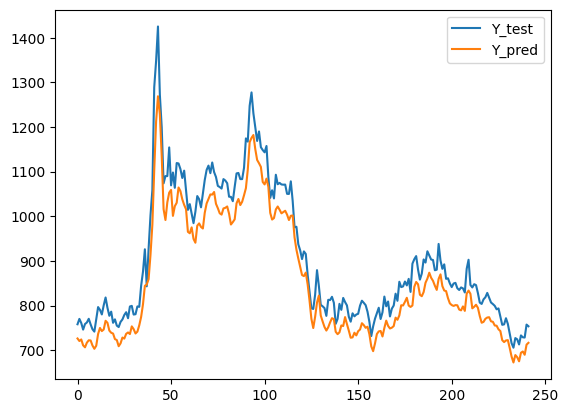

In [59]:
res.plot()

In [62]:
model.evaluate(X_test, Y_test)

8/8 [==============================] - 1s 2ms/step - loss: 5.4944 - mse: 2894.8242


[5.494399070739746, 2894.82421875]

## The model does not actually learn, it imitates the behavior of the function. We saw the same situation in a similar question in the lesson.

# Quesiton 4

In [73]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/26k-consumer-complaints.csv')
df

,Unnamed: 0,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,0,1291006,Debt collection,NaN,Communication tactics,Frequent or repeated calls,TX,76119.0,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,NaN
1,1,1290580,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,TX,77479.0,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes,NaN
2,2,1290564,Mortgage,FHA mortgage,"Application, originator, mortgage broker",NaN,MA,2127.0,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes,Yes
3,3,1291615,Credit card,NaN,Other,NaN,CA,92592.0,2015-03-19,2015-03-19,Navy FCU,In progress,Yes,NaN
4,4,1292165,Debt collection,Non-federal student loan,Cont'd attempts collect debt not owed,Debt resulted from identity theft,NaN,43068.0,2015-03-19,2015-03-19,Transworld Systems Inc.,In progress,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28151,28151,1178184,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201.0,2015-01-01,2015-01-02,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No
28152,28152,1178183,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,GA,30043.0,2015-01-01,2015-01-07,DriveTime,Closed with explanation,Yes,NaN
28153,28153,1178182,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,MN,55105.0,2015-01-01,2015-01-02,Regions,Closed with non-monetary relief,Yes,No
28154,28154,1178181,Payday loan,NaN,Can't stop charges to bank account,NaN,CA,92509.0,2015-01-01,2015-01-07,Moneytree Inc,Closed with explanation,Yes,NaN


In [74]:
df.isnull().sum()

Unnamed: 0                  0
Complaint ID                0
Product                     0
Sub-product             10574
Issue                       2
Sub-issue               14945
State                     421
ZIP code                  280
Date received               0
Date sent to company        0
Company                     0
Company response            0
Timely response?            0
Consumer disputed?      22150
dtype: int64

In [75]:
df[df['Issue'].isnull()]

,Unnamed: 0,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
11730,11730,1235087,Bank account or service,Other bank product/service,NaN,NaN,FL,33428.0,2015-02-09,2015-02-10,Wells Fargo,Closed with explanation,Yes,NaN
13198,13198,1226302,Bank account or service,Checking account,NaN,NaN,FL,33487.0,2015-02-05,2015-02-05,JPMorgan Chase,Closed with monetary relief,Yes,NaN


In [76]:
df.drop(11730, inplace = True)
df.drop(13198, inplace = True)
df.isnull().sum()

Unnamed: 0                  0
Complaint ID                0
Product                     0
Sub-product             10574
Issue                       0
Sub-issue               14943
State                     421
ZIP code                  280
Date received               0
Date sent to company        0
Company                     0
Company response            0
Timely response?            0
Consumer disputed?      22148
dtype: int64

In [77]:
df['Issue']

0                           Communication tactics
1           Cont'd attempts collect debt not owed
2        Application, originator, mortgage broker
3                                           Other
4           Cont'd attempts collect debt not owed
                           ...                   
28151       Cont'd attempts collect debt not owed
28152                Taking out the loan or lease
28153    Loan servicing, payments, escrow account
28154          Can't stop charges to bank account
28155                    Other transaction issues
Name: Issue, Length: 28154, dtype: object

In [78]:
df['Timely response?'].unique()

array(['Yes', 'No'], dtype=object)

In [79]:
vectorizer = CountVectorizer()
x = vectorizer.fit(df['Issue'])
x = vectorizer.transform(df['Issue'])

In [80]:
binarizer = LabelBinarizer()
y = binarizer.fit_transform(df['Timely response?'])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)
print(X_train.shape)
y_train.shape
X_train

(22523, 187)


<22523x187 sparse matrix of type '<class 'numpy.int64'>'
	with 102180 stored elements in Compressed Sparse Row format>

In [97]:
model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', 
              metrics = ['binary_accuracy'],
              optimizer = 'sgd')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 512)               96256     
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 128)               32896     
                                                                 
 dense_24 (Dense)            (None, 2)                 258       
                                                                 
 dense_25 (Dense)            (None, 1)                 3         
                                                                 
Total params: 260,741
Trainable params: 260,741
Non-tr

In [98]:
model.fit(X_train, y_train,
          batch_size = 64,
          epochs = 10,
          validation_data = (X_test, y_test))

Epoch 1/10
352/352 [==============================] - 3s 6ms/step - loss: 0.3727 - binary_accuracy: 0.9109 - val_loss: 0.2061 - val_binary_accuracy: 0.9755
Epoch 2/10
352/352 [==============================] - 2s 5ms/step - loss: 0.1728 - binary_accuracy: 0.9745 - val_loss: 0.1486 - val_binary_accuracy: 0.9755
Epoch 3/10
352/352 [==============================] - 2s 5ms/step - loss: 0.1412 - binary_accuracy: 0.9745 - val_loss: 0.1314 - val_binary_accuracy: 0.9755
Epoch 4/10
352/352 [==============================] - 2s 5ms/step - loss: 0.1301 - binary_accuracy: 0.9745 - val_loss: 0.1241 - val_binary_accuracy: 0.9755
Epoch 5/10
352/352 [==============================] - 2s 5ms/step - loss: 0.1251 - binary_accuracy: 0.9745 - val_loss: 0.1205 - val_binary_accuracy: 0.9755
Epoch 6/10
352/352 [==============================] - 2s 5ms/step - loss: 0.1225 - binary_accuracy: 0.9745 - val_loss: 0.1185 - val_binary_accuracy: 0.9755
Epoch 7/10
352/352 [==============================] - 2s 5ms/ste

In [99]:
y_pred = model.predict(X_test)
result = np.where(y_pred > 0.5, 1, 0) 
conf_matrix = confusion_matrix(y_test, result)
conf_matrix

176/176 [==============================] - 0s 2ms/step


array([[   0,  138],
       [   0, 5493]], dtype=int64)

In [100]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       138
           1       0.98      1.00      0.99      5493

    accuracy                           0.98      5631
   macro avg       0.49      0.50      0.49      5631
weighted avg       0.95      0.98      0.96      5631



C:\Users\90546\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\90546\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\90546\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [101]:
model.evaluate(X_test,y_test)

176/176 [==============================] - 0s 2ms/step - loss: 0.1158 - binary_accuracy: 0.9755


[0.11584717780351639, 0.9754928350448608]

## In this question, the model gives the 0.97 accuracy score but if we look at confusion matrix and classification report the model predicts correctly for True values, but does not predict correctly for False values, so the model does not actually work.